In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('log_reg_real_data.csv')

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
X                                      15493 non-null int64
jumlah_kartu                           15493 non-null int64
outstanding                            15493 non-null int64
limit_kredit                           15493 non-null float64
tagihan                                15493 non-null float64
total_pemakaian_tunai                  15493 non-null float64
total_pemakaian_retail                 15493 non-null float64
sisa_tagihan_tidak_terbayar            15493 non-null float64
kode_cabang                            15393 non-null object
rasio_pembayaran                       15493 non-null float64
persentasi_overlimit                   15493 non-null float64
rasio_pembayaran_3bulan                15493 non-null float64
rasio_pembayaran_6bulan                15493 non-null float64
skor_delikuensi                        15493 non-null int64
flag_kredit_macet               

In [5]:
df.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,0.0,74.78,100.00,0,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,0.0,0.00,0.00,0,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,0.0,100.00,100.91,0,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,0.0,25.01,22.64,0,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,0.0,97.49,99.84,0,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [6]:
df.describe()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,15493.000000,15493.000000,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,15493.00000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,1.549300e+04,1.549300e+04,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000
mean,7747.000000,2.506551,1.159833e+07,2.079833e+07,8.078663e+06,7.453291e+04,2.025857e+06,8.140875e+06,64.64712,3.343533,50.530351,81.666238,0.004776,0.087717,6.634093,2.100421e+06,2.968060e+06,0.468246,0.109362,0.167446,0.202609,0.571102,0.533719
std,4472.588196,1.012655,2.408569e+07,2.955334e+07,1.761286e+07,6.184139e+05,7.927677e+06,1.922430e+07,794.16940,9.241921,1327.275247,1467.822452,0.114088,0.282892,4.675454,8.092612e+06,6.262192e+06,0.473056,0.200159,0.192327,0.274293,0.411928,0.432350
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-18138.00000,0.000000,-57792.340000,-77056.000000,0.000000,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,3874.000000,2.000000,2.000551e+06,5.000000e+06,8.182500e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,20.200000,21.600000,0.000000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035200,0.032900,0.189000,0.155000
50%,7747.000000,2.000000,4.726943e+06,9.000000e+06,3.145857e+06,0.000000e+00,2.010420e+05,2.750923e+06,27.00000,0.000000,50.000000,65.600000,0.000000,0.000000,5.666667,2.480000e+05,1.209318e+06,0.335000,0.022100,0.108000,0.117000,0.575000,0.496000
75%,11620.000000,3.000000,1.064848e+07,2.200000e+07,7.404991e+06,0.000000e+00,1.398000e+06,7.143198e+06,100.00000,1.060000,91.370000,100.000000,0.000000,0.000000,9.330000,1.512235e+06,3.088477e+06,0.930000,0.128000,0.239000,0.285000,0.917000,0.863000
max,15493.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.00000,190.000000,75575.000000,54899.000000,5.000000,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000


# Cleaning Data

In [7]:
df.flag_kredit_macet.value_counts(normalize=True)

0    0.912283
1    0.087717
Name: flag_kredit_macet, dtype: float64

In [8]:
df[df['flag_kredit_macet']==1]['kode_cabang'].value_counts()

A    767
F    144
B    132
I    102
E     57
J     33
H     33
G     30
C     27
K     17
D     12
Name: kode_cabang, dtype: int64

In [9]:
df[(df.kode_cabang.isnull()) & (df['flag_kredit_macet']==1)].index

Int64Index([946, 3454, 5089, 5533, 9206], dtype='int64')

In [10]:
df=df.drop(df[(df.kode_cabang.isnull()) & (df['flag_kredit_macet']==0)].index)

In [11]:
df['kode_cabang'].fillna('A',inplace=True)

# Delete Outlier data dengan Flag Kredit macet = 0

In [12]:
kolom=df.drop(['X','kode_cabang','flag_kredit_macet'],axis=1).columns

In [13]:
def detect_outlier_by_columns(df,col):
    listindex=[]
    for item in col:
        q1=df[item].quantile(0.25)
        q3=df[item].quantile(0.75)
        iqr = q3 - q1
        lower=q1-(iqr*1.5)
        upper=q3+(iqr*1.5)
        listindex.append(list(df[(df[item]<lower) | (df[item]>upper) & (df['flag_kredit_macet']==0)].index))
    return listindex

In [14]:
listindexoutlier=detect_outlier_by_columns(df,kolom)

In [15]:
dict_outlier={}
for item in listindexoutlier:
    for idx in item:
        if idx in dict_outlier:
            dict_outlier[idx]+=1
        else:
            dict_outlier[idx]=1
dict_outlier

{27: 5,
 41: 1,
 73: 8,
 86: 3,
 96: 6,
 99: 1,
 114: 3,
 121: 4,
 130: 2,
 140: 5,
 156: 9,
 166: 6,
 226: 7,
 305: 5,
 313: 10,
 321: 3,
 390: 1,
 391: 4,
 398: 2,
 410: 9,
 437: 2,
 514: 2,
 570: 2,
 579: 7,
 607: 8,
 629: 5,
 641: 2,
 699: 4,
 731: 5,
 735: 7,
 741: 2,
 833: 1,
 878: 5,
 886: 7,
 888: 1,
 895: 4,
 909: 2,
 924: 5,
 1011: 1,
 1020: 1,
 1051: 9,
 1073: 6,
 1102: 6,
 1156: 7,
 1181: 8,
 1195: 1,
 1204: 5,
 1206: 2,
 1218: 1,
 1224: 4,
 1318: 3,
 1326: 6,
 1330: 6,
 1357: 2,
 1378: 5,
 1380: 1,
 1389: 7,
 1403: 1,
 1417: 1,
 1451: 2,
 1476: 2,
 1495: 3,
 1519: 4,
 1535: 4,
 1559: 9,
 1562: 4,
 1605: 6,
 1610: 2,
 1638: 1,
 1643: 9,
 1679: 9,
 1714: 3,
 1724: 4,
 1750: 9,
 1757: 8,
 1765: 5,
 1771: 1,
 1786: 3,
 1798: 7,
 1830: 8,
 1853: 8,
 1899: 4,
 1912: 7,
 1921: 2,
 1937: 5,
 1945: 4,
 1965: 6,
 1966: 8,
 1974: 4,
 1983: 6,
 1996: 4,
 2014: 2,
 2028: 5,
 2043: 7,
 2059: 3,
 2064: 2,
 2069: 2,
 2080: 8,
 2100: 5,
 2122: 2,
 2154: 8,
 2172: 6,
 2233: 1,
 2274: 5,
 22

In [16]:
idxtodrop=[]
for key,value in dict_outlier.items():
    if value >=3 :
        idxtodrop.append(key)
len(idxtodrop)

3019

In [17]:
df=df.drop(idxtodrop)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12379 entries, 0 to 15492
Data columns (total 24 columns):
X                                      12379 non-null int64
jumlah_kartu                           12379 non-null int64
outstanding                            12379 non-null int64
limit_kredit                           12379 non-null float64
tagihan                                12379 non-null float64
total_pemakaian_tunai                  12379 non-null float64
total_pemakaian_retail                 12379 non-null float64
sisa_tagihan_tidak_terbayar            12379 non-null float64
kode_cabang                            12379 non-null object
rasio_pembayaran                       12379 non-null float64
persentasi_overlimit                   12379 non-null float64
rasio_pembayaran_3bulan                12379 non-null float64
rasio_pembayaran_6bulan                12379 non-null float64
skor_delikuensi                        12379 non-null int64
flag_kredit_macet               

In [19]:
df.flag_kredit_macet.value_counts(normalize=True)

0    0.890379
1    0.109621
Name: flag_kredit_macet, dtype: float64

In [20]:
df['kode_cabang'].unique()

array(['I', 'A', 'G', 'B', 'E', 'K', 'F', 'C', 'J', 'H', 'D'],
      dtype=object)

In [21]:
df['kode_cabang']=df['kode_cabang'].astype('category')

In [22]:
df['kode_cabang'].cat.categories=list(range(0,11))

# Modeling 

In [23]:
x = df.drop(['X','flag_kredit_macet'],axis=1)
y = df['flag_kredit_macet']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [25]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# Logistic Regression

In [26]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
prediction_test = logmodel.predict(X_test)
prediction_train = logmodel.predict(X_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
print('class report data test')
print(classification_report(y_test,prediction_test))
print('============================================')
print('class report data train')
print(classification_report(y_train,prediction_train))

class report data test
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3310
           1       0.34      0.17      0.23       404

    accuracy                           0.87      3714
   macro avg       0.62      0.56      0.58      3714
weighted avg       0.84      0.87      0.85      3714

class report data train
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7712
           1       0.36      0.18      0.24       953

    accuracy                           0.87      8665
   macro avg       0.63      0.57      0.59      8665
weighted avg       0.84      0.87      0.86      8665



# Logistic Regression with Undersampling

In [28]:
minority_data=df[df['flag_kredit_macet']==1]
mayority_data=df[df['flag_kredit_macet']==0]

In [29]:
index_for_mayority=np.random.choice(mayority_data.index,len(minority_data))
df_class_0=df.loc[index_for_mayority]
undersampling_df=pd.concat([df_class_0,minority_data])

In [30]:
undersampling_df['flag_kredit_macet'].value_counts()

1    1357
0    1357
Name: flag_kredit_macet, dtype: int64

In [31]:
x_u = undersampling_df.drop(['X','flag_kredit_macet'],axis=1)
y_u = undersampling_df['flag_kredit_macet']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(x_u,y_u,test_size=0.3)

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
prediction_test = logmodel.predict(X_test)
prediction_train = logmodel.predict(X_train)

In [35]:
print('class report data test')
print(classification_report(y_test,prediction_test))
print('============================================')
print('class report data train')
print(classification_report(y_train,prediction_train))

class report data test
              precision    recall  f1-score   support

           0       0.58      0.37      0.45       429
           1       0.50      0.69      0.58       386

    accuracy                           0.53       815
   macro avg       0.54      0.53      0.52       815
weighted avg       0.54      0.53      0.51       815

class report data train
              precision    recall  f1-score   support

           0       0.57      0.40      0.47       928
           1       0.56      0.72      0.63       971

    accuracy                           0.56      1899
   macro avg       0.56      0.56      0.55      1899
weighted avg       0.56      0.56      0.55      1899



# OverSampling

In [36]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [37]:
ros=RandomOverSampler()
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [38]:
X_ros,y_ros=ros.fit_sample(X_train,y_train)

In [39]:
df_over_all=pd.DataFrame(X_ros,columns=x.columns)
df_over_all['flag_kredit_macet'] = y_ros

In [40]:
df_over_all['flag_kredit_macet'].value_counts()

1    7710
0    7710
Name: flag_kredit_macet, dtype: int64

In [41]:
x_o = df_over_all.drop(['flag_kredit_macet'],axis=1)
y_o = df_over_all['flag_kredit_macet']

In [42]:
logmodel = LogisticRegression()
logmodel.fit(x_o,y_o)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
prediction_test = logmodel.predict(X_test)
prediction_train = logmodel.predict(x_o)

In [44]:
print('class report data test')
print(classification_report(y_test,prediction_test))
print('============================================')
print('class report data train')
print(classification_report(y_o,prediction_train))

class report data test
              precision    recall  f1-score   support

           0       0.93      0.49      0.64      3312
           1       0.15      0.71      0.24       402

    accuracy                           0.52      3714
   macro avg       0.54      0.60      0.44      3714
weighted avg       0.85      0.52      0.60      3714

class report data train
              precision    recall  f1-score   support

           0       0.60      0.48      0.53      7710
           1       0.56      0.67      0.61      7710

    accuracy                           0.58     15420
   macro avg       0.58      0.58      0.57     15420
weighted avg       0.58      0.58      0.57     15420



# SMOTE

In [45]:
def class_report_by_algo_smote(x,y):
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    sm=SMOTE(random_state=101)
    X_sm,y_sm=sm.fit_sample(X_train,y_train)
    clf=LogisticRegression()
    clf.fit(X_sm,y_sm)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_sm)
    
    print('class report data test')
    print(classification_report(y_test,prediction_test))
    print('============================================')
    print('class report data train')
    print(classification_report(y_sm,prediction_train))

In [46]:
class_report_by_algo_smote(x,y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


class report data test
              precision    recall  f1-score   support

           0       0.93      0.57      0.71      2768
           1       0.15      0.66      0.25       327

    accuracy                           0.58      3095
   macro avg       0.54      0.62      0.48      3095
weighted avg       0.85      0.58      0.66      3095

class report data train
              precision    recall  f1-score   support

           0       0.64      0.56      0.60      8254
           1       0.61      0.68      0.64      8254

    accuracy                           0.62     16508
   macro avg       0.62      0.62      0.62     16508
weighted avg       0.62      0.62      0.62     16508



Dari hasil LogisticRegression menggunakan Smote, underSampling, dan OverSampling makan didapat hasil OverSampling yang terbaik. maka kita akan melakukan Cut Off pada Model OverSampling

# Optim model OverSampling w/ CUT OFF 

In [47]:
logmodel = LogisticRegression()
logmodel.fit(x_o,y_o)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
proba = logmodel.predict_proba(X_test)

In [49]:
precition_cut_off = []

for item in proba[:,1]:
    if item > 0.48:
        precition_cut_off.append(1)
    else :
        precition_cut_off.append(0)

In [50]:
print(classification_report(y_test,precition_cut_off))

              precision    recall  f1-score   support

           0       0.94      0.24      0.39      3312
           1       0.12      0.88      0.22       402

    accuracy                           0.31      3714
   macro avg       0.53      0.56      0.30      3714
weighted avg       0.85      0.31      0.37      3714



# Class Weight

In [51]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [52]:
logmodel = LogisticRegression(class_weight={0:1,1:10},max_iter=20,random_state=101)
logmodel.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 1, 1: 10}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=20, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=101, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
prediction_test = logmodel.predict(X_test)
prediction_train = logmodel.predict(X_train)

In [54]:
print('class report data test')
print(classification_report(y_test,prediction_test))
print('============================================')
print('class report data train')
print(classification_report(y_train,prediction_train))

class report data test
              precision    recall  f1-score   support

           0       0.92      0.41      0.57      3324
           1       0.12      0.71      0.21       390

    accuracy                           0.45      3714
   macro avg       0.52      0.56      0.39      3714
weighted avg       0.84      0.45      0.53      3714

class report data train
              precision    recall  f1-score   support

           0       0.92      0.41      0.57      7698
           1       0.13      0.71      0.22       967

    accuracy                           0.44      8665
   macro avg       0.52      0.56      0.39      8665
weighted avg       0.83      0.44      0.53      8665



# Class Weight  Logistic Regression with Grid Search

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Best parameters : {'class_weight': {0: 0.19808080808080808, 1: 0.8019191919191919}}


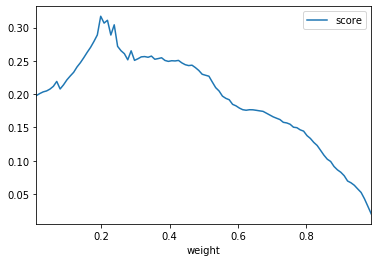

In [55]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.01, 0.99, 100)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(x, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

In [56]:
logmodel = LogisticRegression(class_weight={0: 0.19808080808080808, 1: 0.8019191919191919},max_iter=30)
logmodel.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0,
                   class_weight={0: 0.19808080808080808, 1: 0.8019191919191919},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=30, multi_class='warn', n_jobs=None,
                   penalty='l2', random_state=None, solver='warn', tol=0.0001,
                   verbose=0, warm_start=False)

In [57]:
prediction_test = logmodel.predict(X_test)
prediction_train = logmodel.predict(X_train)

In [58]:
print('class report data test')
print(classification_report(y_test,prediction_test))
print('============================================')
print('class report data train')
print(classification_report(y_train,prediction_train))

class report data test
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      3324
           1       0.19      0.54      0.28       390

    accuracy                           0.71      3714
   macro avg       0.56      0.64      0.55      3714
weighted avg       0.85      0.71      0.77      3714

class report data train
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      7698
           1       0.21      0.55      0.31       967

    accuracy                           0.72      8665
   macro avg       0.57      0.65      0.57      8665
weighted avg       0.85      0.72      0.77      8665

